In [33]:
from utils import get_all_data, read_dataset, mean_square_error,generateSinData
from gp import GaussianProcess, SparseGaussianProcess
from kernels import ARDKernel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [34]:
trainX, trainY, testX, testY = get_all_data("kin40k")

In [32]:
fullgp = GaussianProcess(np.array(trainX[0:500,:],dtype=np.float64), np.array(trainY[0:500,:],dtype=np.float64))

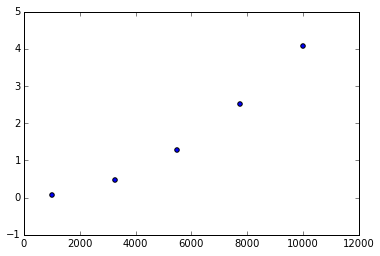

In [22]:
fullgp.RMSprop()

In [117]:
spgp = SparseGaussianProcess(np.array(trainX[0:500,:],dtype=np.float64), np.array(trainY[0:500,:],dtype=np.float64),20)
rms = spgp.RMSprop()
cost = []

In [ ]:
c1 = rms()
for i in range(5000):
    c = rms()
    cost.append(c)
    if not np.isfinite(c) or c1[0]-c[0]<0.001:
        print c
        break;
plt.plot(cost)

In [111]:
spposterior = spgp.getPosteriorPredictive()

In [112]:
e = 0
for x, y in zip(testX,testY):
    m, _  = spposterior(x)
    e += (y-m)**2
e/testX.shape[0]

matrix([[ 0.7866346]])

In [91]:
res = [0.75165385,0.71362669,0.30771117]
M = [5,10,50]

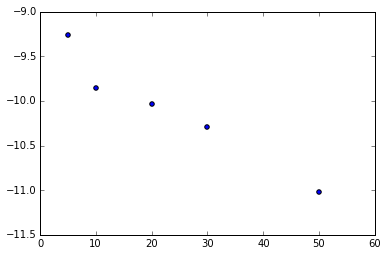

In [93]:
plt.scatter(M,np.log(res))

0.056293041872
0.0140905408774
0.341696231081
0.120724927494
0.460290019496


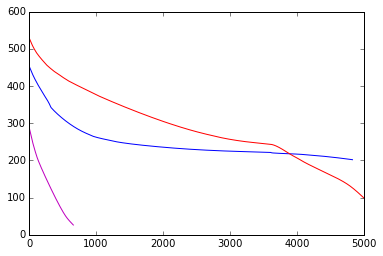

In [28]:
costs = []
params = []
for points in [5,10,20,30,50]:
    spgp = SparseGaussianProcess(np.array(trainX[0:500,:],dtype=np.float64), np.array(trainY[0:500,:],dtype=np.float64),points)
    rms = spgp.Adam()
    cost = []
    param = []
    c1 = rms()
    for i in range(5000):
        c = rms()
        cost.append(c)
        if not np.isfinite(c) or c1[0]-c[0]<0.001:
            break;
    plt.plot(cost)
    costs.append(cost)
    for p in spgp.params:
        param.append(p.eval())
    params.append(param)
    spposterior = spgp.getPosteriorPredictive()
    sparsepreds = []
    i = 0
    while i<testX.shape[0]:
        i+=1000
        x = testX[i-1000:np.min([i,testX.shape[0]]),]
        mu, covar = spposterior(x)
        sparsepreds.extend(mu)
    sparsepreds = np.array(sparsepreds)
    print np.log(mean_square_error(sparsepreds.T,testY[:]))

In [26]:
mean_square_error(sparsepreds.T,testY[:])

1.5276374048996439

In [ ]:
for points,param in zip([50],params):
    spgp = SparseGaussianProcess(np.array(trainX[0:1000,:],dtype=np.float64), np.array(trainY[0:1000,:],dtype=np.float64),points)
    for p,v in zip(param,spgp.params):
        v.set_value(p)
    spposterior = spgp.getPosteriorPredictive()
    sparsepreds = []
    i = 0
    while i<testX.shape[0]:
        i+=1000
        x = testX[i-1000:np.min([i,testX.shape[0]]),]
        mu, covar = spposterior(x)
        sparsepreds.extend(mu)
    sparsepreds = np.array(sparsepreds)
    print np.log(mean_square_error(sparsepreds.T,testY[:]))

In [22]:
costs[5]

IndexError: list index out of range

In [27]:
for p in spgp.params:
    print p.eval()

[  1.00000000e-04   1.00000000e-04   8.05502036e-02   2.44661323e-01
   3.69430255e-01   5.90552030e-01   4.14716765e-01   2.18914827e-01]
1.02555093383
0.706470826676
[[ 0.02772354 -1.41519215  0.72135067 -1.0346717   0.36186556  0.09356114
  -1.49455026  0.49735449]
 [ 0.22399081  1.2278315   1.39359291 -1.1780596  -0.95067402  0.36232831
   0.52559509 -0.92797554]
 [ 0.48895201  0.68192088 -0.81014589 -0.03386362 -1.4633475  -1.07330315
  -0.73793832  0.61028304]
 [-1.17408778  1.5851891   0.36186301  0.47060748 -0.68235506 -0.44785767
  -1.5639923  -1.13007485]
 [-0.42998007 -1.35214869  0.28357763  1.16596736 -1.4093195  -0.70114145
  -0.03039124 -1.0553953 ]
 [-1.15387961  1.01642027 -0.89611368 -0.89995613  1.21317575 -0.40902666
  -0.35069894  1.46869603]
 [ 0.2698465   0.59969065 -0.24303118 -0.76195647 -1.20141219  0.1905946
  -0.82373615 -0.69936209]
 [ 0.06559912  1.48583663  0.70831901 -0.15714277 -0.66473322 -0.98475298
   0.73420512 -1.05175066]
 [ 0.03549024 -0.89999966

In [24]:
spposterior = spgp.getPosteriorPredictive()

In [25]:
sparsepreds = []
i = 0
while i<testX.shape[0]:
    i+=1000
    x = testX[i-1000:np.min([i,testX.shape[0]]),]
    mu, covar = spposterior(x)
    sparsepreds.extend(mu)
sparsepreds = np.array(sparsepreds)
np.log(mean_square_error(sparsepreds.T,testY[:]))

0.12814134900632021

In [22]:
spgp.c.set_value(fullgp.c.eval())
spgp.b.set_value(fullgp.b.eval())
spgp.sigma.set_value(fullgp.sigma.eval())

In [34]:
cost = []
spopt = spgp.RMSprop(only_psudo=True)

In [35]:
for i in range(10):
    cost.append(spopt())

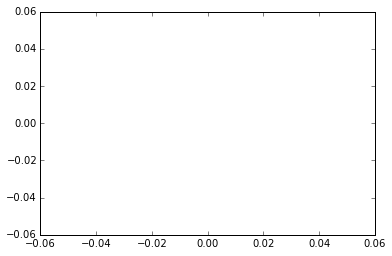

In [36]:
plt.plot(cost)

In [ ]:
fullposterior = spgp.getPosteriorPredictive()

In [ ]:
fpreds = []
i = 0
while i<testX.shape[0]:
    i+=1000
    x = testX[i-1000:np.min([i,testX.shape[0]]),]
    mu, covar = fullposterior(x)
    preds.extend(mu)
fpreds = np.array(fpreds)

In [54]:
np.log(mean_square_error(fpreds.T,testY[:]))

NameError: name 'fpreds' is not defined